In [1]:
# avoid memory leak
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd

In [3]:
# Read GeoData and create a DataFrame
geodata = pd.read_csv('~/Documents/Thesis/HYPE/tests/GeoData.txt', delimiter='\t') 

In [4]:
geodata

,subid,maindown,area,longitude,latitude,elev_mean,slope_mean,rivlen,hds_depth,SLC_1,...,SLC_108,SLC_109,SLC_110,SLC_111,SLC_112,SLC_113,SLC_114,SLC_115,SLC_116,SLC_117
0,58675,-9999,2.730521e+08,-107.976305,48.849060,860.715027,0.00000,129339.991902,2.232598,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,58674,-9999,2.727878e+08,-110.181345,48.645243,851.569946,0.00000,105620.001701,0.509844,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,58673,-9999,2.876408e+08,-109.130976,49.315396,988.979126,0.00000,188640.001102,2.674205,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,58672,-9999,9.586554e+08,-108.892603,49.169295,948.367615,0.00000,295200.002203,1.646900,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,58671,-9999,3.860121e+08,-108.661660,49.257402,922.959106,0.00000,202460.006602,0.782555,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,58185,58184,5.667200e+06,-112.839964,49.570476,909.549744,0.00163,1671.934918,0.000000,0.0,...,0.017857,0.000000,0.000000,0.000000,0.029762,0.000000,0.0,0.0,0.0,0.0
469,58231,58228,1.663663e+08,-113.103429,49.481403,1044.178101,0.00285,37256.337498,0.000000,0.0,...,0.012413,0.001052,0.002104,0.002104,0.003577,0.000000,0.0,0.0,0.0,0.0
470,58184,58183,1.750700e+07,-112.859951,49.577578,924.506165,0.00001,4020.941947,0.000000,0.0,...,0.008081,0.000000,0.000000,0.000000,0.050505,0.000000,0.0,0.0,0.0,0.0
471,58228,58183,2.611930e+07,-112.932045,49.556180,947.332703,0.00483,11789.842472,0.000000,0.0,...,0.009358,0.001337,0.000000,0.000000,0.022727,0.002674,0.0,0.0,0.0,0.0


### Generate groups

In [5]:
# Number of clusters
num_clusters = 5

In [6]:
# Extract features for clustering
features = geodata.set_index('subid')[['slope_mean']]

In [7]:
features

,slope_mean
subid,
58675,0.00000
58674,0.00000
58673,0.00000
58672,0.00000
58671,0.00000
...,...
58185,0.00163
58231,0.00285
58184,0.00001


In [8]:
# Initialize K-means model
kmeans = KMeans(n_clusters=num_clusters, n_init=10)

In [9]:
# Fit the model to the features and get cluster labels
labels = kmeans.fit_predict(features)

In [10]:
len(labels)

473

In [11]:
cluster_df = pd.DataFrame(index=features.index, columns=['groups'])
cluster_df['groups'] = labels

In [12]:
# Add 1 to the cluster labels to start from 1 instead of 0
cluster_df['groups'] = cluster_df['groups'] + 1

In [13]:
cluster_df

,groups
subid,
58675,4
58674,4
58673,4
58672,4
58671,4
...,...
58185,4
58231,4
58184,4


### Visualize groups

Cluster 0: 131 points
Cluster 1: 31 points
Cluster 2: 2 points
Cluster 3: 305 points
Cluster 4: 4 points


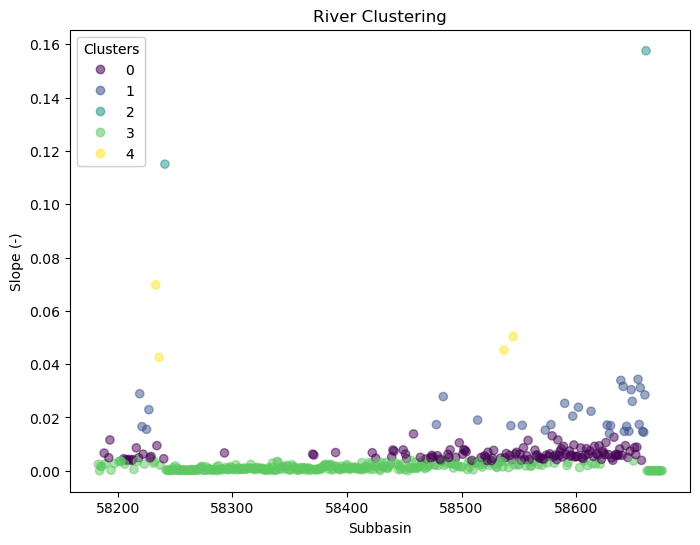

In [14]:
# Plot the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(features.index, features.iloc[:, 0], c=labels, cmap='viridis', alpha=0.5)
plt.title('River Clustering')
plt.xlabel('Subbasin')
plt.ylabel('Slope (-)')

# Create a legend
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")

# Plot legend without colorbar
plt.gca().add_artist(legend1)

# Print the number of points in each cluster
for cluster in range(num_clusters):
    num_points = len(features[labels == cluster])
    print(f"Cluster {cluster}: {num_points} points")

plt.show()

In [15]:
#cluster_df.to_csv('./slope_groups', sep='\t', index=False)